# ML FINAL PROJECT - Kepler Exoplanet Prediction

In [570]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [571]:
df = pd.read_csv("cumulative.csv")
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

### We check for null values.

In [573]:
df.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [574]:
df.koi_disposition.value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

### Removing unrelated columns.

In [575]:
df = df.drop(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_tce_delivname'], axis=1)

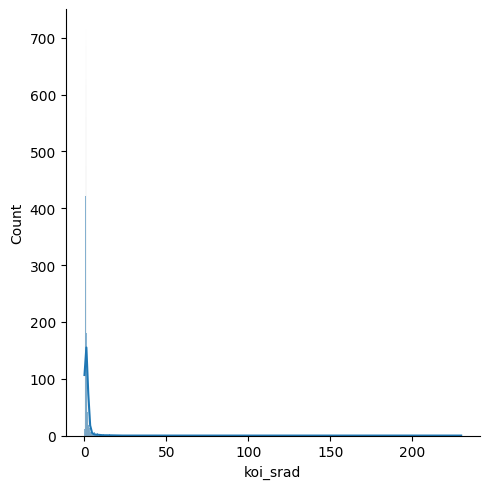

In [576]:
sns.displot(df.koi_srad, kde=True)

In [577]:
df.koi_srad.describe()

count    9201.000000
mean        1.728712
std         6.127185
min         0.109000
25%         0.829000
50%         1.000000
75%         1.345000
max       229.908000
Name: koi_srad, dtype: float64

### Plotting histogram of all integer and float columns to check for categorical data.

C:\Users\91909\AppData\Local\Temp\ipykernel_10264\323003343.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_graphs[i], kde=True)
C:\Users\91909\AppData\Local\Temp\ipykernel_10264\323003343.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_graphs[i], kde=True)
C:\Users\91909\AppData\L

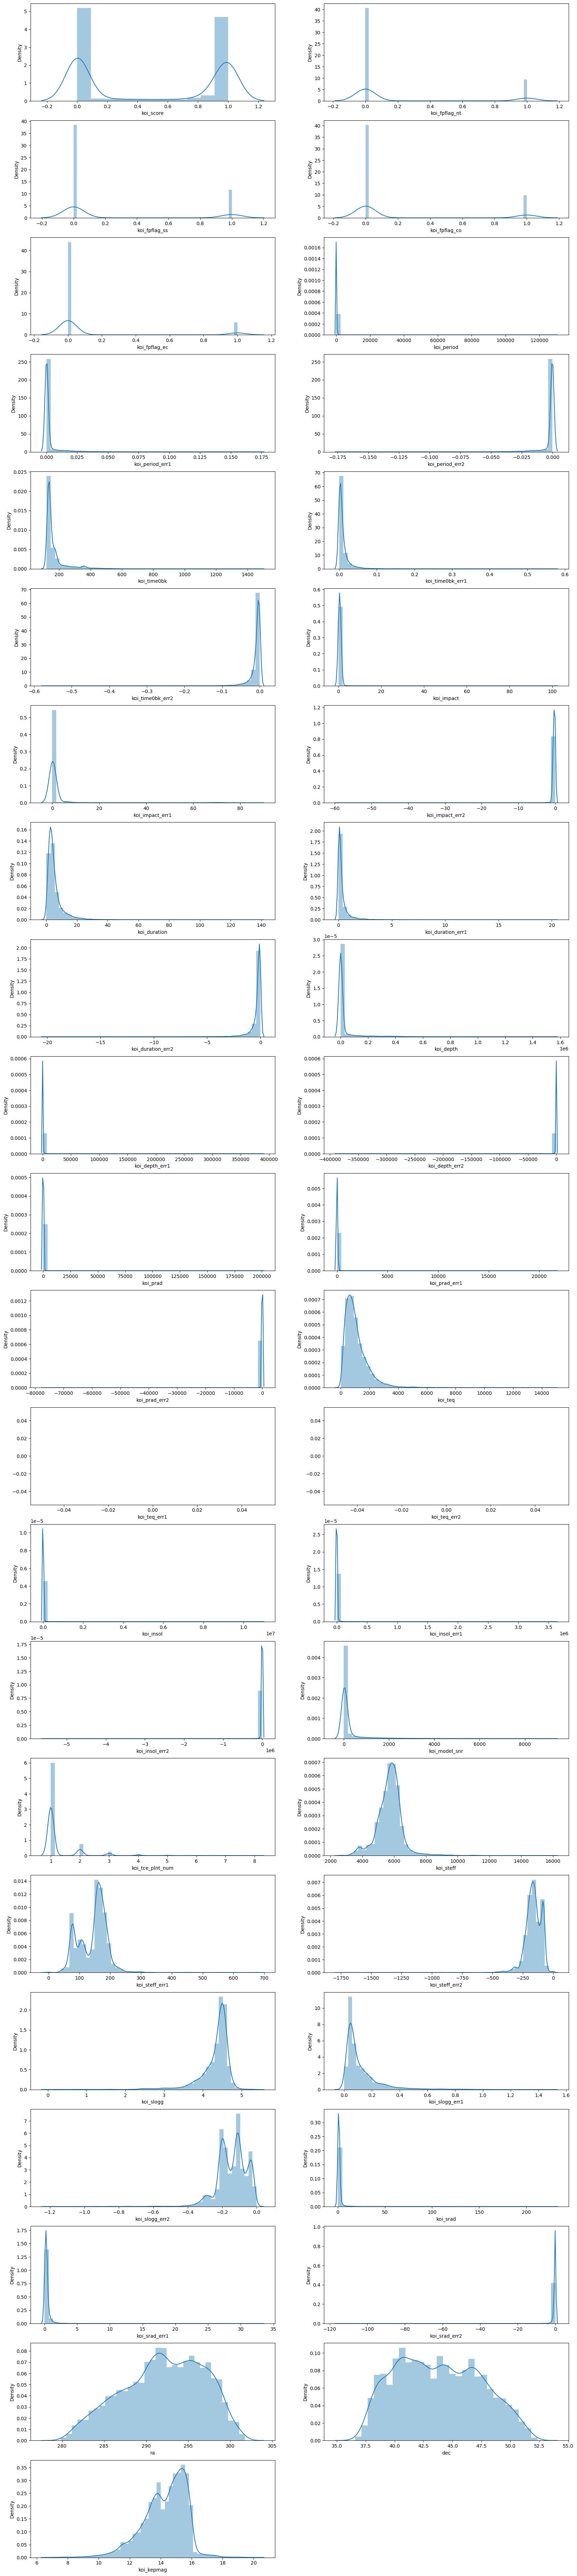

In [578]:
df_graphs = df.drop(["koi_disposition", "koi_pdisposition"], axis=1)
plt.figure(figsize=(20, 100))
for (i, j) in zip(df_graphs.columns, range(1, len(df_graphs.columns)+1)):
        plt.subplot(23, 2, j)
        sns.distplot(df_graphs[i], kde=True)

### Removing "koi_teq_err1" and "koi_teq_err2" because they are empty columns.

In [579]:
df = df.drop(["koi_teq_err1", "koi_teq_err2"], axis=1)

In [580]:
df.koi_tce_plnt_num.value_counts()

koi_tce_plnt_num
1.0    7745
2.0     972
3.0     326
4.0     111
5.0      41
6.0      14
7.0       8
8.0       1
Name: count, dtype: int64

In [581]:
df.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

### After some observations, the following columns are detected to contain categorical data and are thus stored in a list.

In [582]:
categorical_data = ["koi_disposition", "koi_pdisposition", "koi_fpflag_nt", "koi_fpflag_ss", "koi_fpflag_co", "koi_fpflag_ec", "koi_tce_plnt_num"]

In [583]:
df.isnull().mean()

koi_disposition      0.000000
koi_pdisposition     0.000000
koi_score            0.157884
koi_fpflag_nt        0.000000
koi_fpflag_ss        0.000000
koi_fpflag_co        0.000000
koi_fpflag_ec        0.000000
koi_period           0.000000
koi_period_err1      0.047470
koi_period_err2      0.047470
koi_time0bk          0.000000
koi_time0bk_err1     0.047470
koi_time0bk_err2     0.047470
koi_impact           0.037955
koi_impact_err1      0.047470
koi_impact_err2      0.047470
koi_duration         0.000000
koi_duration_err1    0.047470
koi_duration_err2    0.047470
koi_depth            0.037955
koi_depth_err1       0.047470
koi_depth_err2       0.047470
koi_prad             0.037955
koi_prad_err1        0.037955
koi_prad_err2        0.037955
koi_teq              0.037955
koi_insol            0.033563
koi_insol_err1       0.033563
koi_insol_err2       0.033563
koi_model_snr        0.037955
koi_tce_plnt_num     0.036177
koi_steff            0.037955
koi_steff_err1       0.048934
koi_steff_

### Plotting boxplot of every numerical data columns to look for outliers.

In [584]:
len(df.drop(categorical_data, axis=1).columns)

36

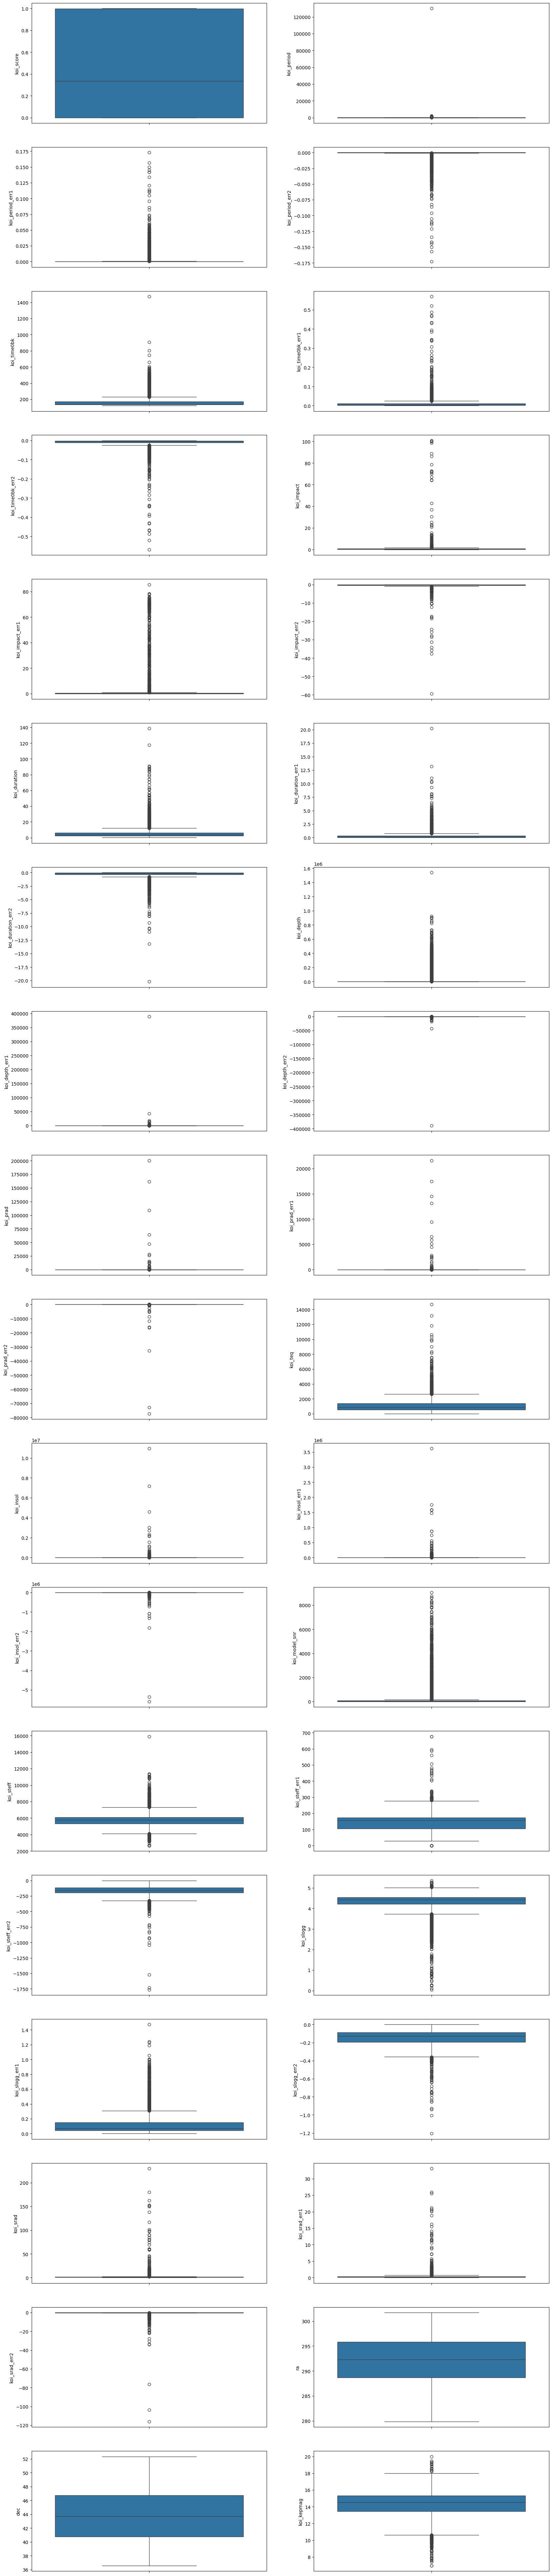

In [585]:
df_graphs2 = df.drop(categorical_data, axis=1)

plt.figure(figsize=(20, 100))
for (i, j) in zip(df_graphs2.columns, range(1, len(df_graphs2.columns)+1)):
        plt.subplot(18, 2, j)
        sns.boxplot(df_graphs2[i])

### Checking the amount of outlier data in each column to decide whether to remove rows or not. Outliers are not to be removed if they exceed 20 quantity.

In [586]:
df.koi_insol.describe()

count    9.243000e+03
mean     7.745737e+03
std      1.592047e+05
min      0.000000e+00
25%      2.015000e+01
50%      1.416000e+02
75%      8.702900e+02
max      1.094755e+07
Name: koi_insol, dtype: float64

In [587]:
print(len(df[(df.koi_kepmag < 12) | (df.koi_kepmag > 16)]))
print(len(df[(df.koi_srad > 120)]))
print(len(df[(df.koi_srad_err1 > 24)]))
print(len(df[(df.koi_srad_err2 < -30)]))
print(len(df[(df.koi_slogg_err1 > 1.1)]))

878
7
3
6
4


In [588]:
print(len(df[(df.koi_steff > 14000)]))
print(len(df[(df.koi_steff_err1 < 50) | (df.koi_steff_err1 > 500)]))
print(len(df[(df.koi_steff_err2 < -1250)]))
print(len(df[(df.koi_insol > 0.4e+07)]))
print(len(df[(df.koi_insol_err1 > 1.25e+06)]))
print(len(df[(df.koi_insol_err2 < -2e+06)]))

1
52
3
3
5
2


In [589]:
print(len(df[(df.koi_prad > 50000)]))
print(len(df[(df.koi_prad_err1 > 4000)]))
print(len(df[(df.koi_prad_err2 < -30000)]))
print(len(df[(df.koi_teq > 8000)]))

4
9
3
11


In [590]:
print(len(df[(df.koi_depth > 1.2e+06)]))
print(len(df[(df.koi_depth_err1 > 40000)]))
print(len(df[(df.koi_depth_err2 < -40000)]))
print(len(df[(df.koi_duration > 100)]))
print(len(df[(df.koi_duration_err1 > 12.5)]))
print(len(df[(df.koi_duration_err2 < -10)]))

1
2
2
2
2
5


In [591]:
print(len(df[(df.koi_impact > 60)]))
print(len(df[(df.koi_impact_err1 > 80)]))
print(len(df[(df.koi_impact_err2 < -20)]))
print(len(df[(df.koi_time0bk > 700)]))
print(len(df[(df.koi_time0bk_err1 > 0.4)]))
print(len(df[(df.koi_time0bk_err2 < -0.4)]))
print(len(df[(df.koi_period > 800)]))

14
1
9
4
7
7
12


### Eliminating all rows containing outliers. The values have been carefully picked after closely observing the boxplots.

In [592]:
df2 = (df[(df.koi_impact < 60)])
df2 = (df[(df.koi_impact_err1 < 80)])
df2 = (df[(df.koi_impact_err2 > -20)])
df2 = (df[(df.koi_time0bk < 700)])
df2 = (df[(df.koi_time0bk_err1 < 0.5)])
df2 = (df[(df.koi_time0bk_err2 > -0.5)])
df2 = (df[(df.koi_period < 80000)])
df2 = (df[(df.koi_depth < 1.2e+06)])
df2 = (df[(df.koi_depth_err1 < 50000)])
df2 = (df[(df.koi_depth_err2 > -50000)])
df2 = (df[(df.koi_duration < 100)])
df2 = (df[(df.koi_duration_err1 < 12.5)])
df2 = (df[(df.koi_duration_err2 > -10)])
df2 = (df[(df.koi_prad < 50000)])
df2 = (df[(df.koi_prad_err1 < 4000)])
df2 = (df[(df.koi_prad_err2 > -30000)])
df2 = (df[(df.koi_teq < 11000)])
df2 = (df[(df.koi_steff_err2 > -1250)])
df2 = (df[(df.koi_insol < 0.4e+07)])
df2 = (df[(df.koi_insol_err1 < 1.25e+06)])
df2 = (df[(df.koi_insol_err2 > -1.5e+06)])
df2 = (df[(df.koi_steff < 14000)])
df2 = (df[(df.koi_srad < 150)])
df2 = (df[(df.koi_srad_err1 < 23)])
df2 = (df[(df.koi_srad_err2 > -40)])
df2 = (df[(df.koi_slogg_err1 < 1.1)])

df2

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,1,8.589871,1.850000e-04,-1.850000e-04,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,CANDIDATE,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


### Filling the missing categorical data. We replace the nulls by the most frequent category.

In [593]:
df2[categorical_data].isnull().sum()

koi_disposition       0
koi_pdisposition      0
koi_fpflag_nt         0
koi_fpflag_ss         0
koi_fpflag_co         0
koi_fpflag_ec         0
koi_tce_plnt_num    248
dtype: int64

In [594]:
df2.koi_tce_plnt_num.mode()

0    1.0
Name: koi_tce_plnt_num, dtype: float64

In [595]:
df2.koi_tce_plnt_num.fillna(1, inplace=True)

C:\Users\91909\AppData\Local\Temp\ipykernel_10264\3485970779.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2.koi_tce_plnt_num.fillna(1, inplace=True)
C:\Users\91909\AppData\Local\Temp\ipykernel_10264\3485970779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.koi_tce_plnt_num.fillna(1, inplace=True)


In [596]:
df2[categorical_data].isnull().sum()

koi_disposition     0
koi_pdisposition    0
koi_fpflag_nt       0
koi_fpflag_ss       0
koi_fpflag_co       0
koi_fpflag_ec       0
koi_tce_plnt_num    0
dtype: int64

### We fill all the nulls in numerical data with the mean of the respective columns. Decided to replace by mean because it gave better results than mode.

In [597]:
for i in df2.drop(categorical_data, axis=1).columns:
        df2[i].fillna(df2[i].mean(), inplace=True)

C:\Users\91909\AppData\Local\Temp\ipykernel_10264\2759851787.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[i].fillna(df2[i].mean(), inplace=True)
C:\Users\91909\AppData\Local\Temp\ipykernel_10264\2759851787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[i].fillna(df2[i].mean(), inplace=True)


### All the missing values are dealt with.

In [598]:
df2.isnull().sum()

koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra                   0
dec                  0
koi_kepmag           0
dtype: int6

### Encoding the 'koi_pdisposition' column because is the only object column in the dataset.

In [599]:
df2.koi_pdisposition = pd.get_dummies(df2.koi_pdisposition, dtype=int, drop_first=True)
df2

C:\Users\91909\AppData\Local\Temp\ipykernel_10264\3983949509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.koi_pdisposition = pd.get_dummies(df2.koi_pdisposition, dtype=int, drop_first=True)


,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,1,0.000,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,1,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,FALSE POSITIVE,1,0.000,0,0,0,1,8.589871,1.850000e-04,-1.850000e-04,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,FALSE POSITIVE,1,0.000,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,CANDIDATE,0,0.497,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,FALSE POSITIVE,1,0.021,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [600]:
df2.drop(categorical_data, axis=1).columns

Index(['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

### Scaling all the numerical columns (only the numerical data) with StandardScaler. Chose StandardScaler because it gave better results.

In [633]:
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2.drop(categorical_data, axis=1))#.drop(categorical_data, axis=1))
df2_scaled = pd.DataFrame(df2_scaled, columns=['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'])

In [634]:
# df2_scaled[["koi_disposition", "koi_pdisposition"]] = df2[["koi_disposition", "koi_pdisposition"]]

In [635]:
df2_scaled[categorical_data] = df2[categorical_data]

In [636]:
df2_scaled

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,ra,dec,koi_kepmag,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_tce_plnt_num
0,1.149744,-0.047724,-0.258931,0.258931,0.072392,-0.340320,0.340320,-0.175954,-0.172364,0.148950,...,-0.025600,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0
1,1.080033,-0.014893,-0.232068,0.232068,-0.046462,-0.280258,0.280258,-0.042314,-0.200283,-0.089288,...,-0.025600,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,2.0
2,-1.099009,-0.040116,-0.260504,0.260504,0.151059,-0.410055,0.410055,0.074014,0.345907,0.204298,...,1.039556,1.197246,0.867845,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0
3,-1.099009,-0.053387,-0.262290,0.262290,0.068968,-0.430635,0.430635,0.167258,-0.194246,0.192266,...,-1.369939,1.239219,0.987019,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0
4,1.149744,-0.052811,-0.261863,0.261863,0.088044,-0.385809,0.385809,-0.007385,-0.181311,-0.117363,...,-0.693472,1.222825,0.921880,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,-1.099009,-0.048380,-0.239754,0.239754,-0.498154,0.257654,-0.257654,0.012053,-0.204163,-0.167899,...,1.405992,0.874758,0.158725,CANDIDATE,0.0,0.0,0.0,0.0,0.0,1.0
9088,-1.099009,-0.054271,-0.262308,0.262308,-0.502760,-0.428206,0.428206,0.159969,-0.201145,0.226758,...,1.078193,0.908226,-0.134398,FALSE POSITIVE,1.0,1.0,0.0,0.0,0.0,1.0
9089,0.018621,-0.053385,-0.260151,0.260151,-0.483563,-0.096096,0.096096,-0.207238,-0.161046,0.231571,...,-1.165176,0.927507,0.365243,FALSE POSITIVE,1.0,0.0,0.0,1.0,1.0,1.0
9090,-1.051785,-0.054159,-0.262026,0.262026,-0.495700,-0.309847,0.309847,-0.175651,-0.173334,0.148148,...,0.442984,0.931136,0.830094,FALSE POSITIVE,1.0,1.0,0.0,1.0,1.0,1.0


### Label Encoding the target column and storing it another new column.
### Labelled as follows -
### 0 = CANDIDATE
### 1 = CONFIRMED
### 2 = FLASE POSITIVE

In [637]:
le = LabelEncoder()
df_corr = df2_scaled
# df_corr.koi_disposition = pd.DataFrame(encoder.fit_transform(df_corr.koi_disposition))

In [638]:
df_corr

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,ra,dec,koi_kepmag,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_tce_plnt_num
0,1.149744,-0.047724,-0.258931,0.258931,0.072392,-0.340320,0.340320,-0.175954,-0.172364,0.148950,...,-0.025600,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0
1,1.080033,-0.014893,-0.232068,0.232068,-0.046462,-0.280258,0.280258,-0.042314,-0.200283,-0.089288,...,-0.025600,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,2.0
2,-1.099009,-0.040116,-0.260504,0.260504,0.151059,-0.410055,0.410055,0.074014,0.345907,0.204298,...,1.039556,1.197246,0.867845,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0
3,-1.099009,-0.053387,-0.262290,0.262290,0.068968,-0.430635,0.430635,0.167258,-0.194246,0.192266,...,-1.369939,1.239219,0.987019,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0
4,1.149744,-0.052811,-0.261863,0.261863,0.088044,-0.385809,0.385809,-0.007385,-0.181311,-0.117363,...,-0.693472,1.222825,0.921880,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,-1.099009,-0.048380,-0.239754,0.239754,-0.498154,0.257654,-0.257654,0.012053,-0.204163,-0.167899,...,1.405992,0.874758,0.158725,CANDIDATE,0.0,0.0,0.0,0.0,0.0,1.0
9088,-1.099009,-0.054271,-0.262308,0.262308,-0.502760,-0.428206,0.428206,0.159969,-0.201145,0.226758,...,1.078193,0.908226,-0.134398,FALSE POSITIVE,1.0,1.0,0.0,0.0,0.0,1.0
9089,0.018621,-0.053385,-0.260151,0.260151,-0.483563,-0.096096,0.096096,-0.207238,-0.161046,0.231571,...,-1.165176,0.927507,0.365243,FALSE POSITIVE,1.0,0.0,0.0,1.0,1.0,1.0
9090,-1.051785,-0.054159,-0.262026,0.262026,-0.495700,-0.309847,0.309847,-0.175651,-0.173334,0.148148,...,0.442984,0.931136,0.830094,FALSE POSITIVE,1.0,1.0,0.0,1.0,1.0,1.0


In [639]:
df2_scaled

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,ra,dec,koi_kepmag,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_tce_plnt_num
0,1.149744,-0.047724,-0.258931,0.258931,0.072392,-0.340320,0.340320,-0.175954,-0.172364,0.148950,...,-0.025600,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0
1,1.080033,-0.014893,-0.232068,0.232068,-0.046462,-0.280258,0.280258,-0.042314,-0.200283,-0.089288,...,-0.025600,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,2.0
2,-1.099009,-0.040116,-0.260504,0.260504,0.151059,-0.410055,0.410055,0.074014,0.345907,0.204298,...,1.039556,1.197246,0.867845,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0
3,-1.099009,-0.053387,-0.262290,0.262290,0.068968,-0.430635,0.430635,0.167258,-0.194246,0.192266,...,-1.369939,1.239219,0.987019,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0
4,1.149744,-0.052811,-0.261863,0.261863,0.088044,-0.385809,0.385809,-0.007385,-0.181311,-0.117363,...,-0.693472,1.222825,0.921880,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,-1.099009,-0.048380,-0.239754,0.239754,-0.498154,0.257654,-0.257654,0.012053,-0.204163,-0.167899,...,1.405992,0.874758,0.158725,CANDIDATE,0.0,0.0,0.0,0.0,0.0,1.0
9088,-1.099009,-0.054271,-0.262308,0.262308,-0.502760,-0.428206,0.428206,0.159969,-0.201145,0.226758,...,1.078193,0.908226,-0.134398,FALSE POSITIVE,1.0,1.0,0.0,0.0,0.0,1.0
9089,0.018621,-0.053385,-0.260151,0.260151,-0.483563,-0.096096,0.096096,-0.207238,-0.161046,0.231571,...,-1.165176,0.927507,0.365243,FALSE POSITIVE,1.0,0.0,0.0,1.0,1.0,1.0
9090,-1.051785,-0.054159,-0.262026,0.262026,-0.495700,-0.309847,0.309847,-0.175651,-0.173334,0.148148,...,0.442984,0.931136,0.830094,FALSE POSITIVE,1.0,1.0,0.0,1.0,1.0,1.0


In [640]:
df_corr["koi_disposition_le"] = pd.DataFrame(le.fit_transform(df_corr.koi_disposition))

In [641]:
df_corr

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,dec,koi_kepmag,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_tce_plnt_num,koi_disposition_le
0,1.149744,-0.047724,-0.258931,0.258931,0.072392,-0.340320,0.340320,-0.175954,-0.172364,0.148950,...,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1.080033,-0.014893,-0.232068,0.232068,-0.046462,-0.280258,0.280258,-0.042314,-0.200283,-0.089288,...,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,2.0,1
2,-1.099009,-0.040116,-0.260504,0.260504,0.151059,-0.410055,0.410055,0.074014,0.345907,0.204298,...,1.197246,0.867845,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0,2
3,-1.099009,-0.053387,-0.262290,0.262290,0.068968,-0.430635,0.430635,0.167258,-0.194246,0.192266,...,1.239219,0.987019,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0,2
4,1.149744,-0.052811,-0.261863,0.261863,0.088044,-0.385809,0.385809,-0.007385,-0.181311,-0.117363,...,1.222825,0.921880,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,-1.099009,-0.048380,-0.239754,0.239754,-0.498154,0.257654,-0.257654,0.012053,-0.204163,-0.167899,...,0.874758,0.158725,CANDIDATE,0.0,0.0,0.0,0.0,0.0,1.0,0
9088,-1.099009,-0.054271,-0.262308,0.262308,-0.502760,-0.428206,0.428206,0.159969,-0.201145,0.226758,...,0.908226,-0.134398,FALSE POSITIVE,1.0,1.0,0.0,0.0,0.0,1.0,2
9089,0.018621,-0.053385,-0.260151,0.260151,-0.483563,-0.096096,0.096096,-0.207238,-0.161046,0.231571,...,0.927507,0.365243,FALSE POSITIVE,1.0,0.0,0.0,1.0,1.0,1.0,2
9090,-1.051785,-0.054159,-0.262026,0.262026,-0.495700,-0.309847,0.309847,-0.175651,-0.173334,0.148148,...,0.931136,0.830094,FALSE POSITIVE,1.0,1.0,0.0,1.0,1.0,1.0,2


In [642]:
df2_scaled

,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,dec,koi_kepmag,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_tce_plnt_num,koi_disposition_le
0,1.149744,-0.047724,-0.258931,0.258931,0.072392,-0.340320,0.340320,-0.175954,-0.172364,0.148950,...,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1.080033,-0.014893,-0.232068,0.232068,-0.046462,-0.280258,0.280258,-0.042314,-0.200283,-0.089288,...,1.199336,0.801967,CONFIRMED,0.0,0.0,0.0,0.0,0.0,2.0,1
2,-1.099009,-0.040116,-0.260504,0.260504,0.151059,-0.410055,0.410055,0.074014,0.345907,0.204298,...,1.197246,0.867845,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0,2
3,-1.099009,-0.053387,-0.262290,0.262290,0.068968,-0.430635,0.430635,0.167258,-0.194246,0.192266,...,1.239219,0.987019,FALSE POSITIVE,1.0,0.0,1.0,0.0,0.0,1.0,2
4,1.149744,-0.052811,-0.261863,0.261863,0.088044,-0.385809,0.385809,-0.007385,-0.181311,-0.117363,...,1.222825,0.921880,CONFIRMED,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,-1.099009,-0.048380,-0.239754,0.239754,-0.498154,0.257654,-0.257654,0.012053,-0.204163,-0.167899,...,0.874758,0.158725,CANDIDATE,0.0,0.0,0.0,0.0,0.0,1.0,0
9088,-1.099009,-0.054271,-0.262308,0.262308,-0.502760,-0.428206,0.428206,0.159969,-0.201145,0.226758,...,0.908226,-0.134398,FALSE POSITIVE,1.0,1.0,0.0,0.0,0.0,1.0,2
9089,0.018621,-0.053385,-0.260151,0.260151,-0.483563,-0.096096,0.096096,-0.207238,-0.161046,0.231571,...,0.927507,0.365243,FALSE POSITIVE,1.0,0.0,0.0,1.0,1.0,1.0,2
9090,-1.051785,-0.054159,-0.262026,0.262026,-0.495700,-0.309847,0.309847,-0.175651,-0.173334,0.148148,...,0.931136,0.830094,FALSE POSITIVE,1.0,1.0,0.0,1.0,1.0,1.0,2


### Plotting heatmap of the complete dataset to select the best columns and avoid overfitting.

<Axes: >

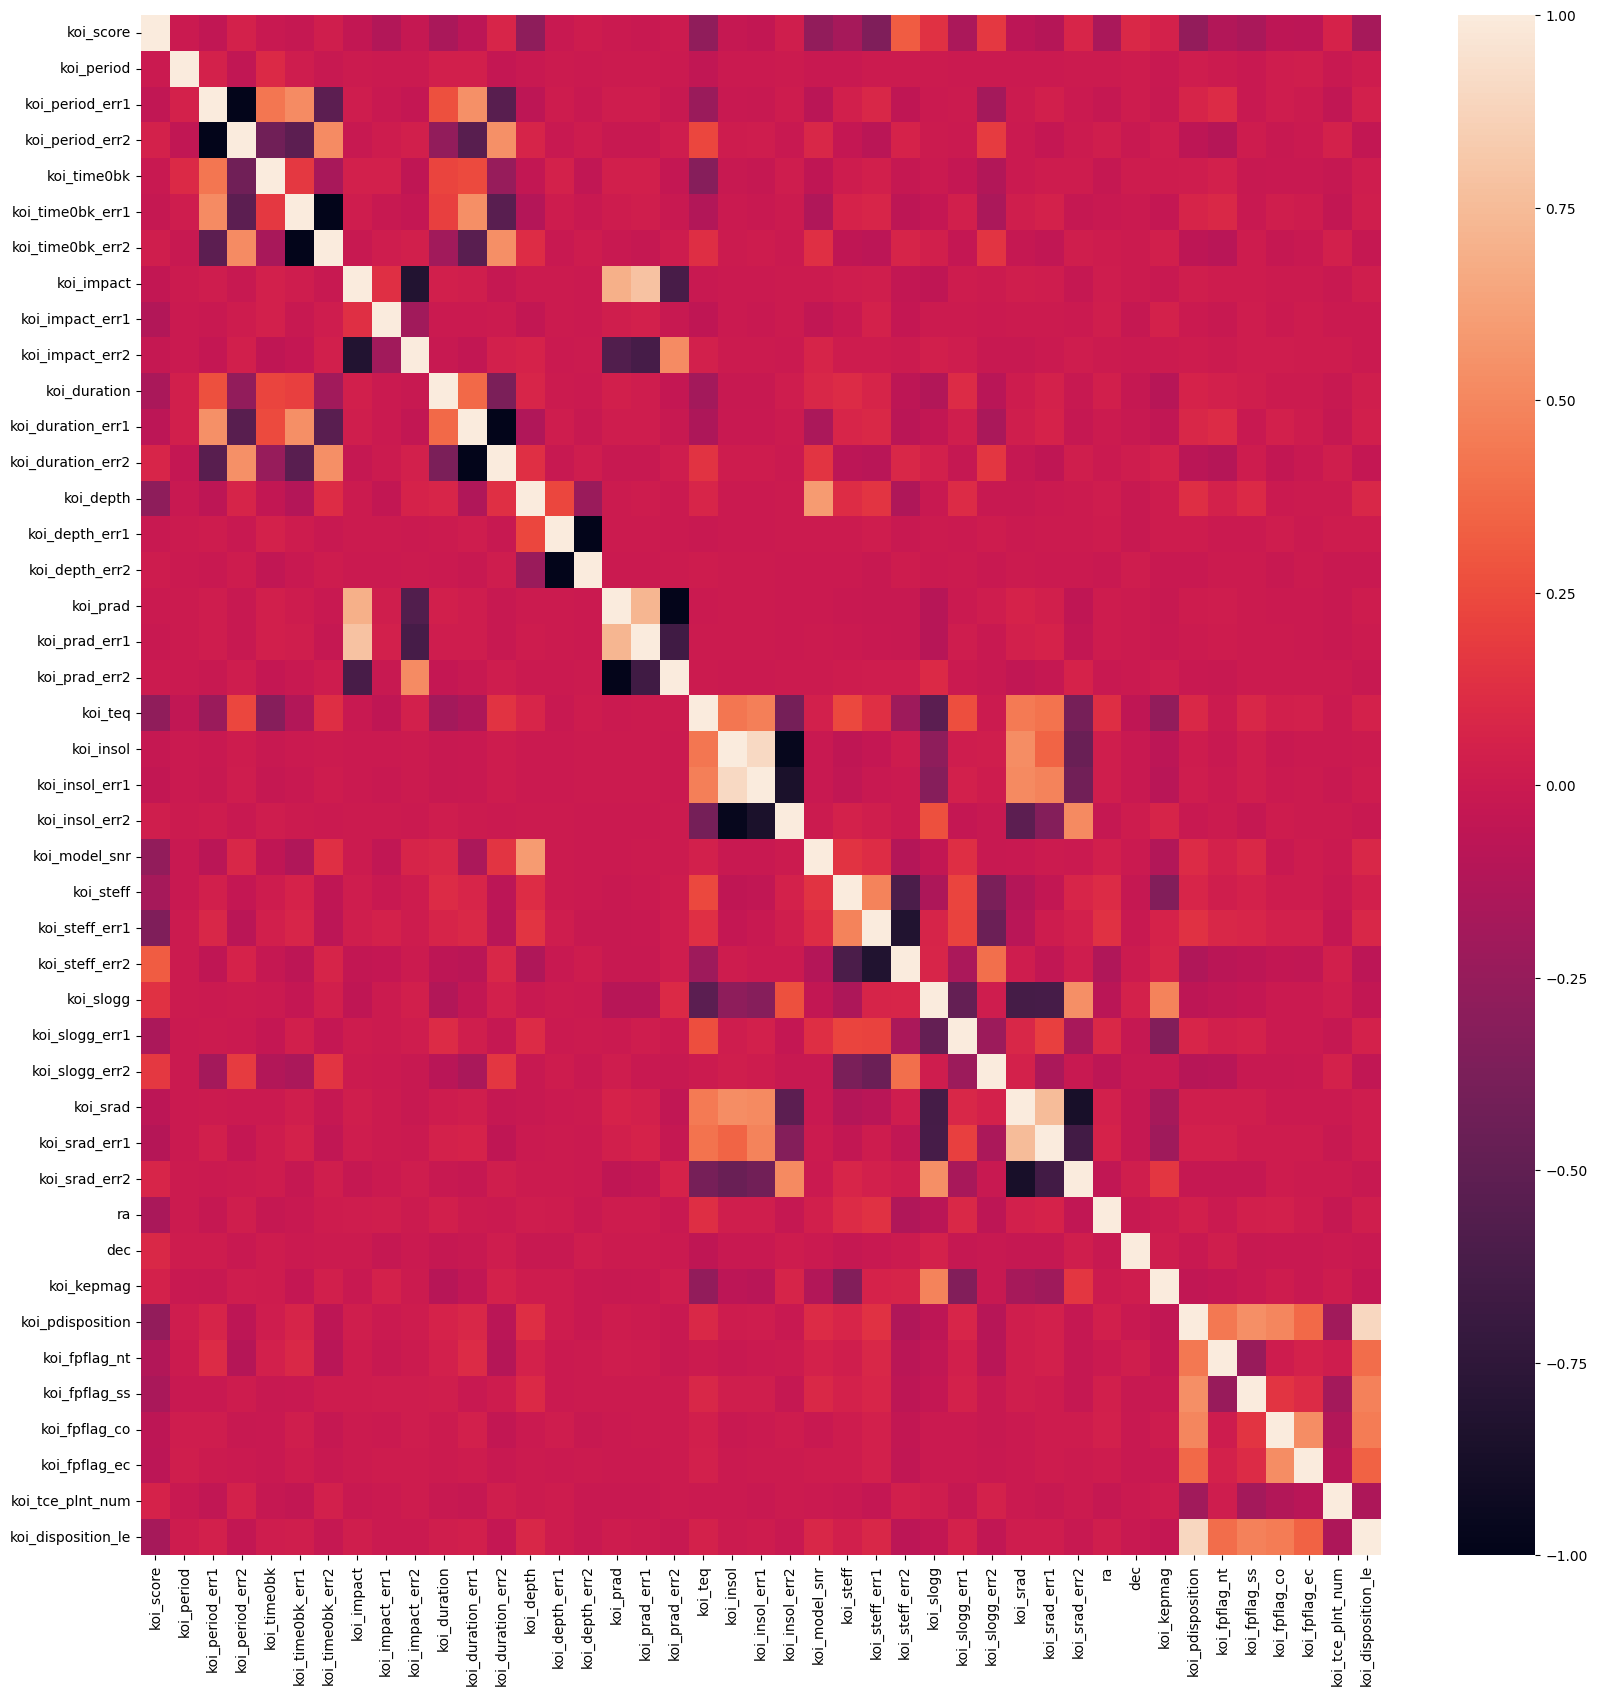

In [643]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr.drop("koi_disposition", axis=1).corr())

In [644]:
df.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [645]:
df2_scaled.columns

Index(['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag',
       'koi_disposition', 'koi_pdisposition', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_tce_plnt_num',
       'koi_disposition_le'],
      dtype='object')

### The following columns are dropped because their value lies near 0 in the correlation matrix.

In [646]:
df2_scaled = df2_scaled.drop(['koi_score', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag', 'koi_tce_plnt_num'], axis=1)

In [647]:
# df2_scaled = df2_scaled.drop(['koi_fpflag_nt', 'koi_fpflag_ss',
#        'koi_fpflag_co', 'koi_fpflag_ec'], axis=1)

In [648]:
df2_scaled.dropna(subset=["koi_disposition"], inplace=True)

### Seperating the rows which are assigned CANDIDATES.

In [649]:
df_non_candidates = df2_scaled[(df2_scaled["koi_disposition"] != "CANDIDATE")]
df_candidates = df2_scaled[(df2_scaled.koi_disposition == "CANDIDATE")]
df_candidates

,koi_disposition,koi_pdisposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disposition_le
37,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
58,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
62,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
63,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
72,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
9073,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
9082,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
9084,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0
9086,CANDIDATE,0.0,0.0,0.0,0.0,0.0,0


In [650]:
target_non_candidates = df_non_candidates.koi_disposition_le
target_non_candidates

0       1
1       1
2       2
3       2
4       1
       ..
9085    2
9088    2
9089    2
9090    2
9091    2
Name: koi_disposition_le, Length: 6562, dtype: int32

### Splitting the dataset and keeping 30% for testing randomly.

In [651]:
x_train, x_test, y_train, y_test = train_test_split(df_non_candidates.drop(["koi_disposition", "koi_disposition_le"], axis=1), target_non_candidates, test_size=0.3, random_state=42)

In [652]:
lgr = LogisticRegression()
nb = GaussianNB()
rfc = RandomForestClassifier()
svc = SVC()

### Training and scoring the models.

In [653]:
lgr.fit(x_train, y_train)
nb.fit(x_train, y_train)
rfc.fit(x_train, y_train)
svc.fit(x_train, y_train)

SVC()

In [654]:
lgr_pred = lgr.predict(x_test)
svc_pred = svc.predict(x_test)
nb_pred = nb.predict(x_test)
rfc_pred = rfc.predict(x_test)

In [655]:
def score(a, b):
        print(f"Accuracy: {accuracy_score(a, b)}")
        print(f"Precision: {precision_score(a, b)}")
        print(f"F1 score: {f1_score(a, b)}")
        print(f"Recall: {recall_score(a, b)}")

In [656]:
score(lgr_pred, y_test)

Accuracy: 0.9939055358049771
Precision: 0.9831223628691983
F1 score: 0.9914893617021276
Recall: 1.0


In [657]:
score(svc_pred, y_test)

Accuracy: 0.9939055358049771
Precision: 0.9831223628691983
F1 score: 0.9914893617021276
Recall: 1.0


In [658]:
score(nb_pred, y_test)

Accuracy: 0.9939055358049771
Precision: 0.9831223628691983
F1 score: 0.9914893617021276
Recall: 1.0


In [659]:
score(rfc_pred, y_test)

Accuracy: 0.9939055358049771
Precision: 0.9831223628691983
F1 score: 0.9914893617021276
Recall: 1.0


### Plotting confusion matrices.

In [660]:
def conf_matrix(y_true, y_pred):
        cm = confusion_matrix(y_true, y_pred)
        display = ConfusionMatrixDisplay(confusion_matrix=cm)
        display.plot()
        plt.show()

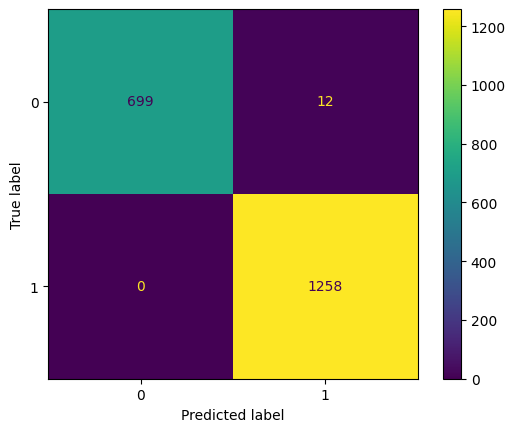

In [661]:
conf_matrix(y_test, rfc_pred)

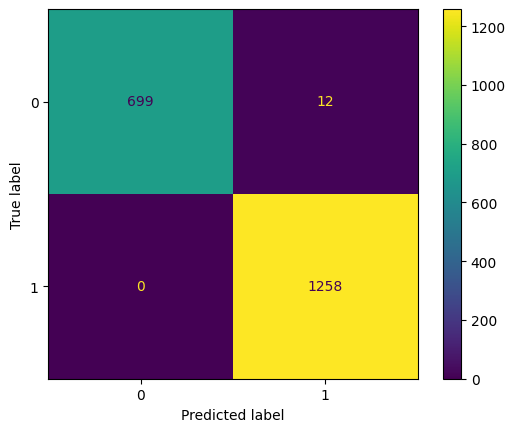

In [662]:
conf_matrix(y_test, lgr_pred)

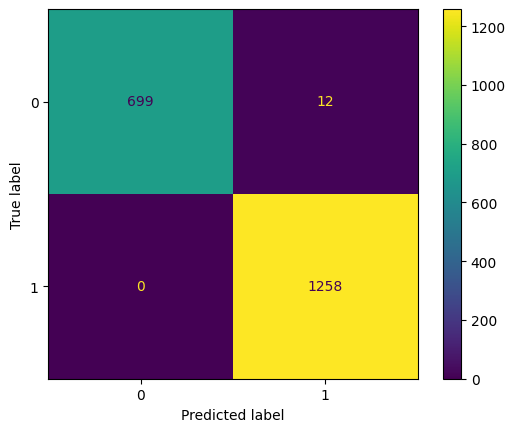

In [663]:
conf_matrix(y_test, svc_pred)

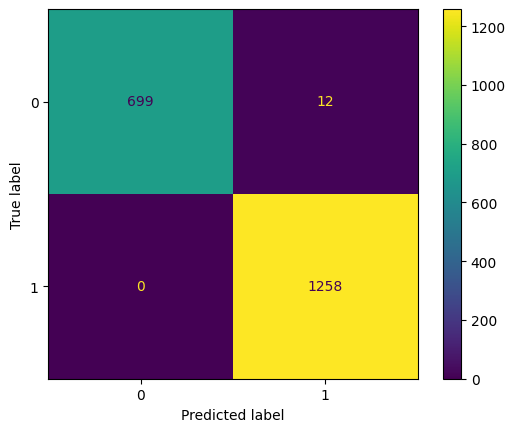

In [664]:
conf_matrix(y_test, nb_pred)